# Titanic EDA

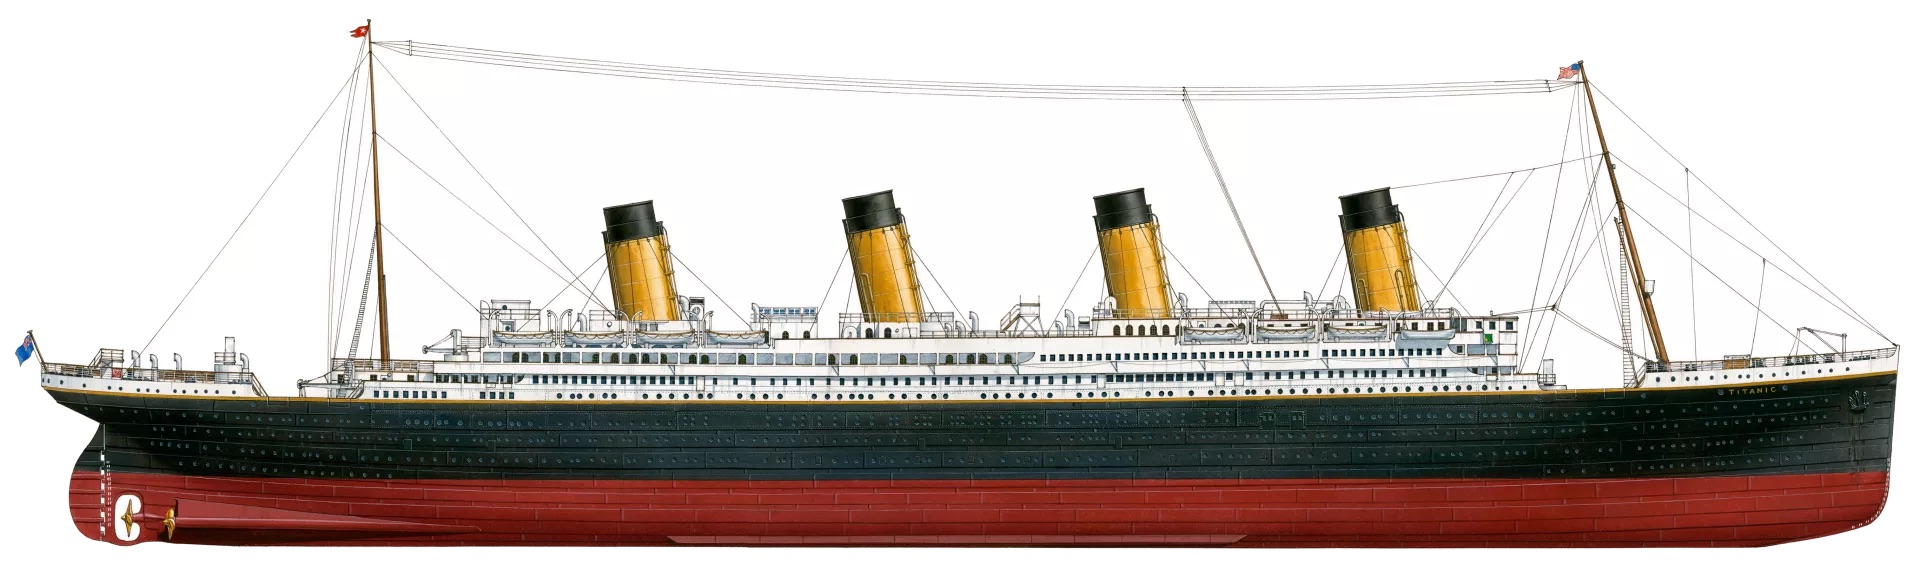

# Problem Statement

Write functions for the following tasks:

1.Plot two numerical columns.

2.Plot one numerical and one categorical column.

3.Plot two numerical columns and one categorical column.

4.Check null values in a column.

5.Check the cardinality of a categorical column.

In [1]:
#importing nessary library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Reading data from Titanic - Machine Learning from Disaster Kaggel

In [2]:
#reading data from Titanic - Machine Learning from Disaster Kaggel train.csv
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking Dtypes
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 4.Check null values in a column

In [4]:
#user defined function for calculating total and percentage using isnull()
def missing_check(titanic):
    total = titanic.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (titanic.isnull().sum()/titanic.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(titanic)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [5]:
#missing value treatement Filling na values with mean and mode respectively
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())
titanic['Cabin']=titanic['Cabin'].fillna(titanic['Cabin'].mode())
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].mode())

In [6]:
#converting interger to float for further computation 
titanic[['PassengerId','Survived','Pclass','SibSp','Parch']]=titanic[['PassengerId','Survived','Pclass','SibSp','Parch']].astype('float64')

In [7]:
#checking Dtypes
titanic.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 1.Plot two numerical columns.

# TWO Numerical varibales means it comes under Bivariate Analysis

some of the Bivariate plot are

01. Bar plot
02. Hexbin or Joint Plot 
03. Scattered Plot 
04. Reg Plot 
05. Line Plot 
06. Point Map 
07. Violin Plot

# Function to plot Two numerical columns 

Name of the function is twoNumCol. 

1. This function first checks the dtype for both parameters 
2. Then if the user input is not in numeric return "Enter Valid Input"
3. using if statement for user specific input for plot
4. Using sns(Seaborn)library ploting graphs 
5. c1 is first numeric feature entry
6. c2 is second numeric feature entry
7. n is type of graph input entry

In [8]:
def twoNumCol(c1,c2,n):
    if c1.dtype=='float64' and c2.dtype=='float64':
        if(n==0 or n>8):
            return "Enter Valid Input"
        if(n==1):
            print('Plotting Bar Chart')
            plt.figure(figsize=(10,5))
            sns.barplot(data=titanic,x=c1,y=c2)
            plt.show()
        if(n==2):
            print('Plotting Hexbin Chart')
            plt.figure(figsize=(90,30))
            sns.jointplot(x=c1,y=c2,kind='hex')
            plt.show()
        if(n==3):
            print('Plotting Scatter Chart')
            plt.figure(figsize=(10,5))
            sns.scatterplot(x=c1,y=c2,data=titanic)
            plt.show()
        if(n==4):
            print('Plotting Regression Chart')
            plt.figure(figsize=(10,5))
            sns.regplot(x=c1,y=c2,data=titanic)
            plt.show()
        if(n==5):
            print('Plotting Line Chart')
            plt.figure(figsize=(10,5))
            sns.lineplot(x=c1,y=c2,data=titanic)
            plt.show()
        if(n==6):
            print('Plotting Ponit Chart')
            plt.figure(figsize=(5,5))
            sns.pointplot(x=c1,y=c2,data=titanic)
            plt.show()
        if(n==7):
            print('Plotting Violin Chart')
            plt.figure(figsize=(10,5))
            sns.violinplot(x=c1,y=c2,data=titanic)
            plt.show()    
        return  
    else:
        return 'Pass 2 numeric columns'

You can plot graph on:
01. Bar plot
02. Hexbin or Joint Plot 
03. Scattered Plot 
04. Reg Plot 
05. Line Plot 
06. Point Map 
07. Violin Plot
Enter your Choice1
Plotting Bar Chart


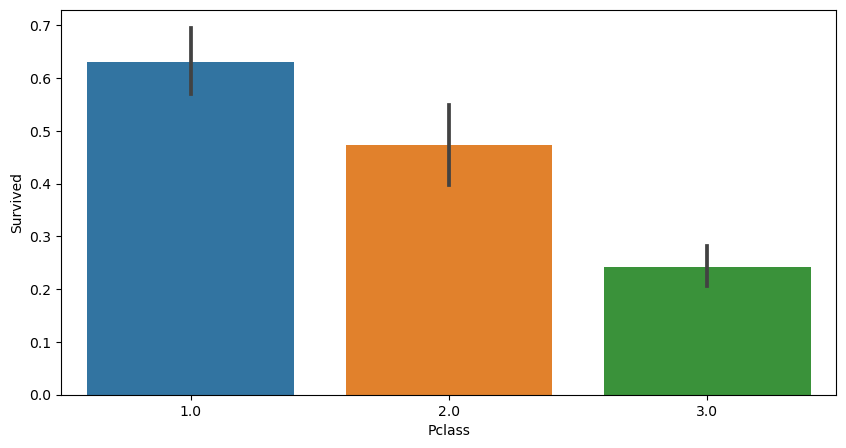

In [9]:
print('You can plot graph on:\n01. Bar plot\n02. Hexbin or Joint Plot \n03. Scattered Plot \n04. Reg Plot \n05. Line Plot \n06. Point Map \n07. Violin Plot')
n=int(input('Enter your Choice'))
twoNumCol(titanic['Pclass'],titanic['Survived'],n)

Pclass 1 passengers survived more compared to Pclass 3

Plotting Bar Chart


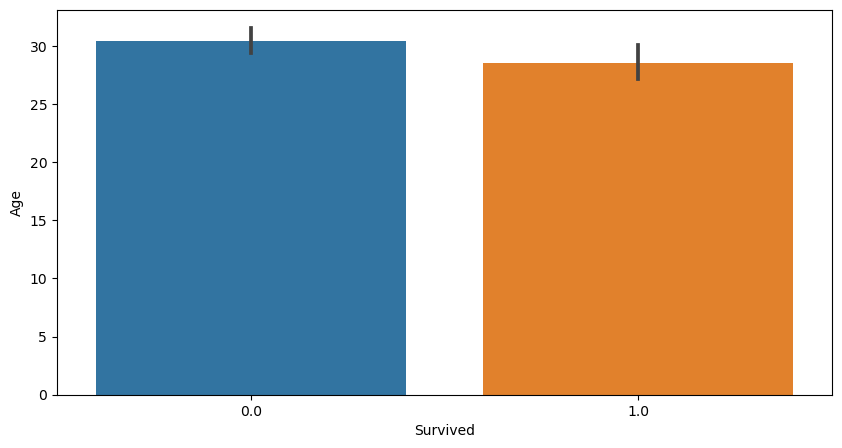

In [10]:
twoNumCol(titanic['Survived'],titanic['Age'],1)

Most of them survived are in the age of 28 years

Plotting Bar Chart


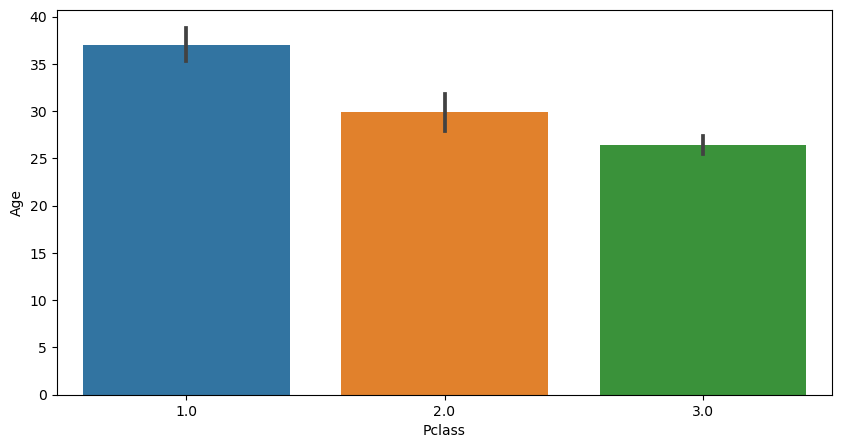

In [11]:
twoNumCol(titanic['Pclass'],titanic['Age'],1)

Compare two passenger class 3 most of the aged people are are in passenger class 1 

1. pclass 1 has passengers of age 35 to 40 years 

2. pclass 2 has passengers of age 25 to 30 years 

3. pclass 3 as passengers of age 25

Plotting Bar Chart


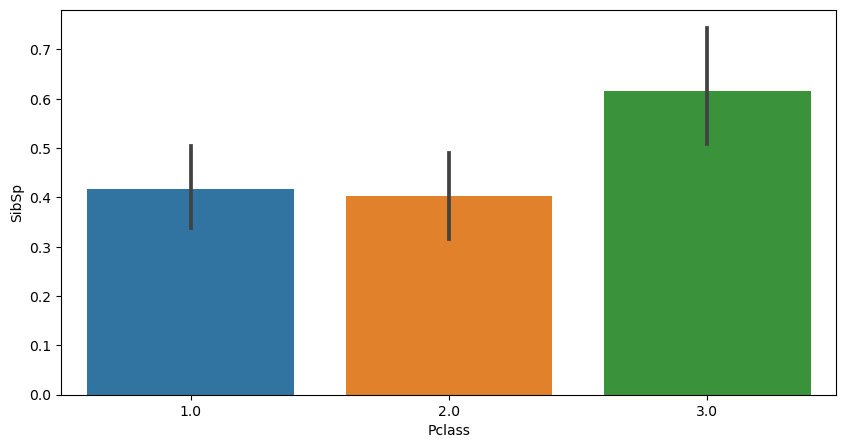

In [12]:
twoNumCol(titanic['Pclass'],titanic['SibSp'],1)

Most of these siblings and spouse were  in passenger class 3

Plotting Bar Chart


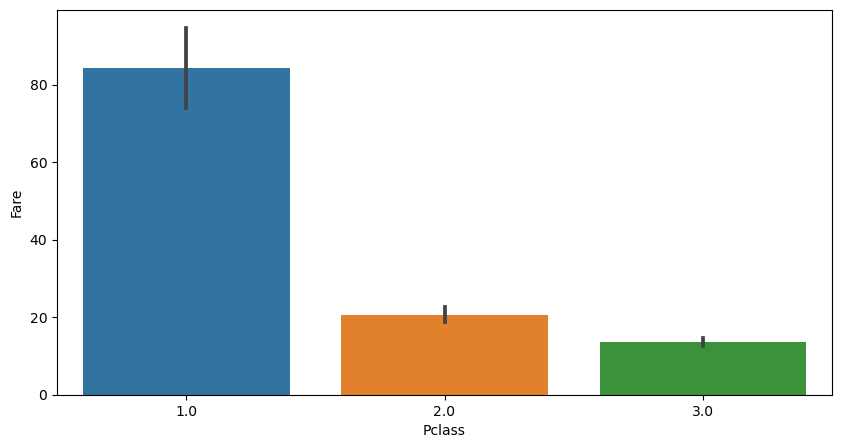

In [13]:
twoNumCol(titanic['Pclass'],titanic['Fare'],1)

Passenger class 1 has highest fair price compared to passenger class 3

In [14]:
twoNumCol(titanic['Embarked'],titanic['Survived'],1)

'Pass 2 numeric columns'

Plotting Scatter Chart


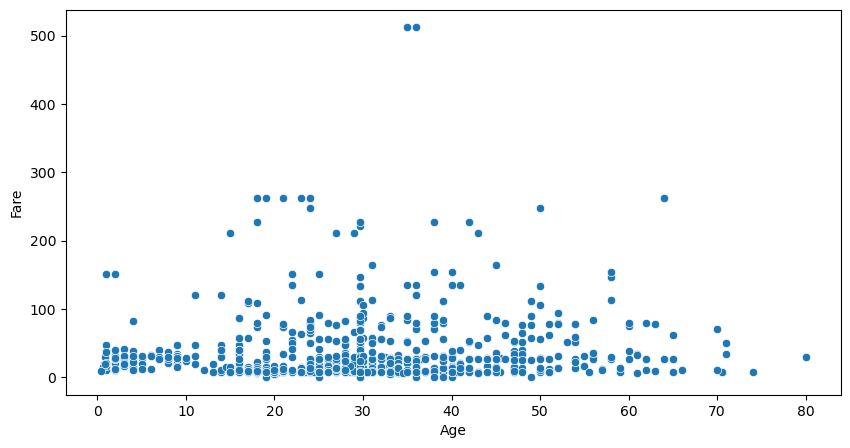

In [15]:
twoNumCol(titanic['Age'],titanic['Fare'],3)

Most of the people were age of 20 to 15 years where most belong to passenger class 3 cos it has low fare price compared to passenger class 2 passenger class 2 belong to mid range fare price of 75 to 100 Euro

Plotting Regression Chart


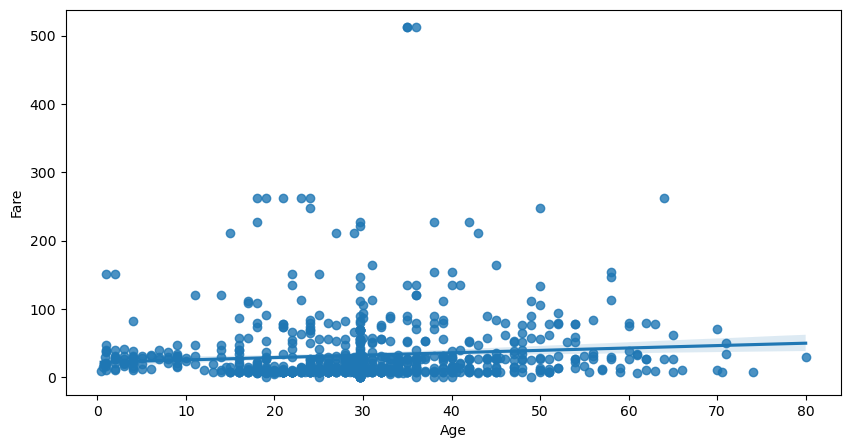

In [16]:
twoNumCol(titanic['Age'],titanic['Fare'],4)

This method is used to plot data and a linear regression model fit

Plotting Line Chart


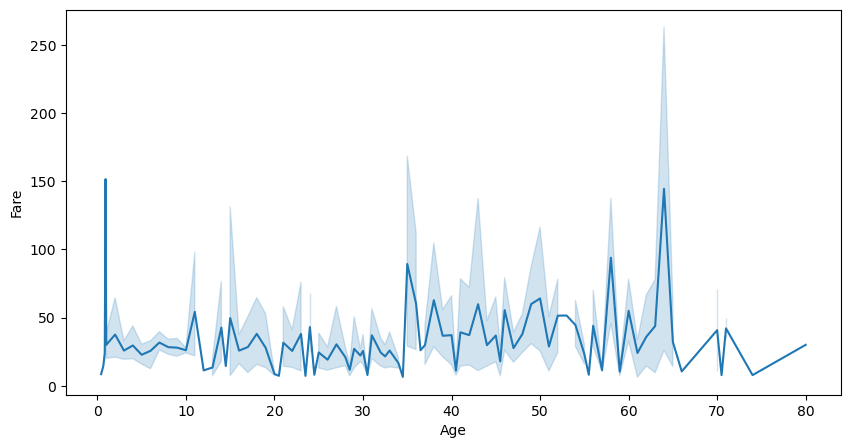

In [17]:
twoNumCol(titanic['Age'],titanic['Fare'],5)

people who are aged between 60 to 65 it has highest fare price means they are rich and they belong to passenger class 1

Plotting Line Chart


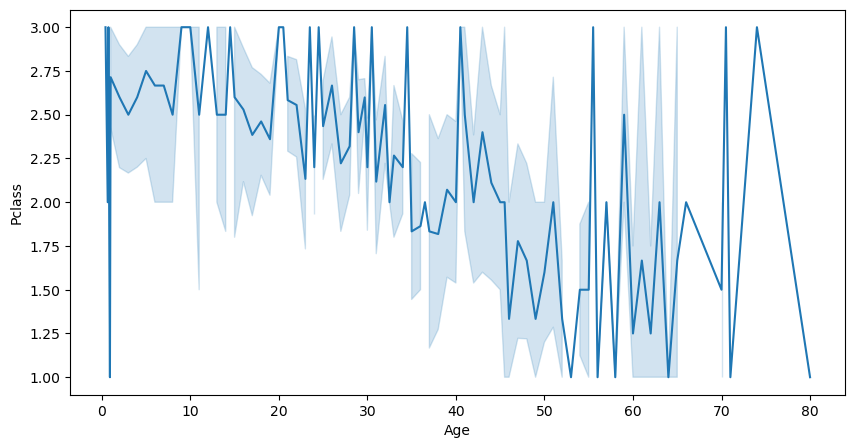

In [18]:
twoNumCol(titanic['Age'],titanic['Pclass'],5)

Plotting Ponit Chart


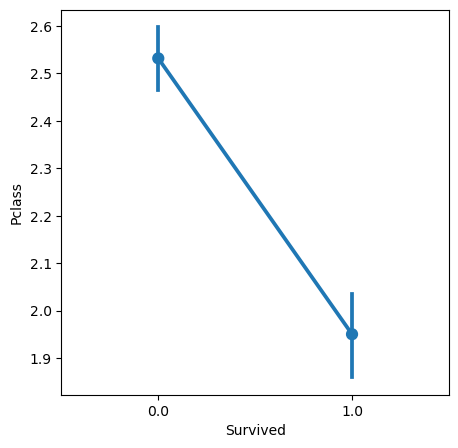

In [19]:
twoNumCol(titanic['Survived'],titanic['Pclass'],6)

Most of the people who survived are from passenger class 1 where people who died where from passenger class 3

Plotting Ponit Chart


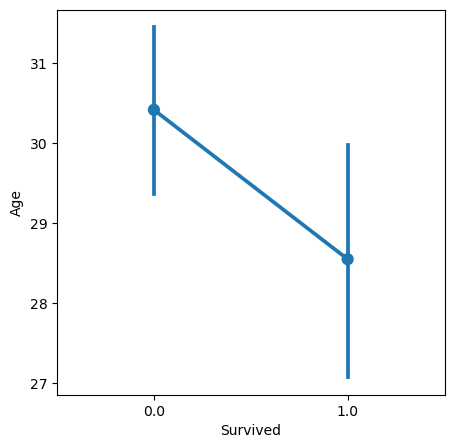

In [20]:
twoNumCol(titanic['Survived'],titanic['Age'],6)

People who survived from Titanic incident where in the age group of 27 to 30 years where most of the people who died in this incident are above 30 years

Plotting Ponit Chart


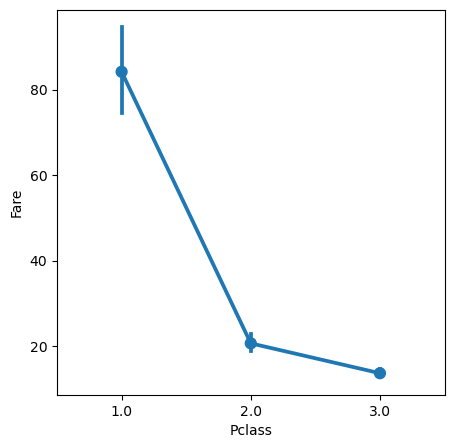

In [21]:
twoNumCol(titanic['Pclass'],titanic['Fare'],6)

Ticket fare price of passenger class 1 high compared to passenger class 2 and passenger class 3. Passenger class 3 has lowest fair price

Plotting Violin Chart


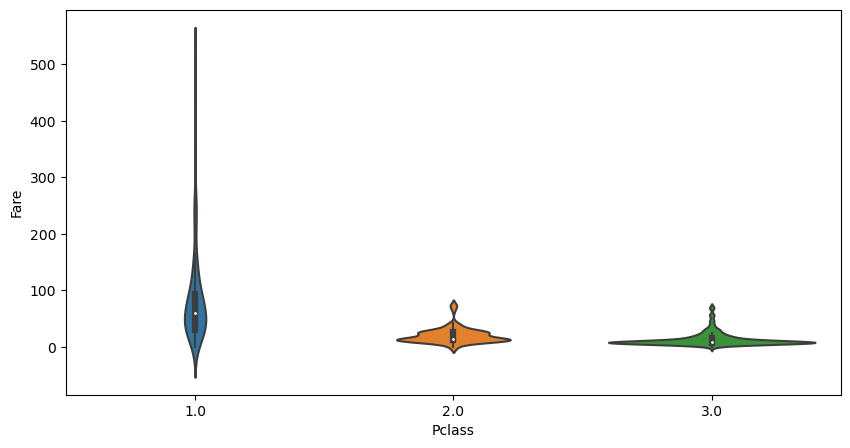

In [22]:
twoNumCol(titanic['Pclass'],titanic['Fare'],7)

 violin plots depict summary statistics and the density of each variable.

Plotting Violin Chart


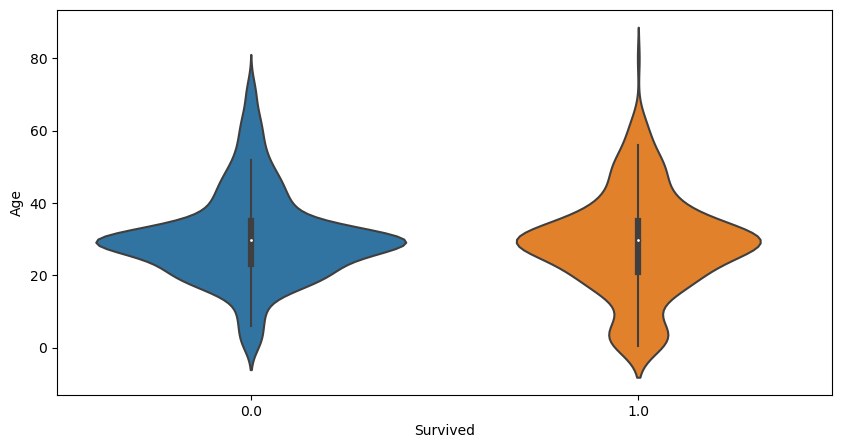

In [23]:
twoNumCol(titanic['Survived'],titanic['Age'],7)

Most people survived and dead are in the range of 20 to 40 years old. most of the the women were saved. 

# 2.Plot one numerical and one categorical column.

# Function to plot ONE numerical ONE catagorical columns 

Name of the function is OneNumOneCat. 

1. This function first checks the dtype for both parameters 
2. Then if the user input is not in numeric return "Enter Valid Input"
3. using if statement for user specific input for plot
4. Using sns(Seaborn)library ploting graphs 
5. c1 is first numeric feature entry
6. c2 is second catagorical feature entry
7. n is type of graph input entry

# One Numerical  ONE Caragorical varibales means it comes under Bivariate Analysis

some of the Bivariate plot are

01. Bar plot
02. Hist Plot 
03. Catagorical Scattered Plot 
04. Boxplots Plot 
05. Line Plot 
06. Point Map 
07. Violin Plot

In [24]:
def OneNumOneCat(c1,c2,n):
    if c1.dtype=='float64' and c2.dtype=='object':
        if(n==0 or n>8):
            return "Enter Valid Input"
        if(n==1):
            print('Plotting Bar Chart')
            plt.figure(figsize=(10,5))
            sns.barplot(data=titanic,x=c1,y=c2,palette="Blues")
            plt.show()
        if(n==2):
            print('Plotting histogram Chart')
            plt.figure(figsize=(5,5))
            sns.histplot(x=c2,y=c1,data=titanic)
            plt.show()
        if(n==3):
            print('Plotting Categorical Scatterplot')
            plt.figure(figsize=(10,10))
            sns.catplot(x=c,y=c1,data=titanic)
            plt.show()
        if(n==4):
            print('Plotting Boxplots ')
            plt.figure(figsize=(10,10))
            sns.catplot(x=c1,y=c2,data=titanic,kind='boxen')
            plt.show()
        if(n==5):
            print('Plotting Linepolt')
            plt.figure(figsize=(10,10))
            sns.lineplot(x=c1,y=c2,data=titanic)
            plt.show()
        if(n==6):
            print('Plotting Pointplot')
            plt.figure(figsize=(5,5))
            sns.pointplot(x=c1,y=c2,data=titanic)
            plt.show()
        if(n==7):
            print('Plotting Violinplot')
            plt.figure(figsize=(5,5))
            sns.violinplot(x=c1,y=c2,data=titanic)
            plt.show()   
        return  
    else:
        return 'Pass numeric and categorical columns'

You can plot graph on:
01. Bar plot
02. Hexbin or Joint Plot 
03. Scattered Plot 
04. Reg Plot 
05. Line Plot 
06. Point Map 
07. Violin Plot
Enter your Choice1
Plotting Bar Chart


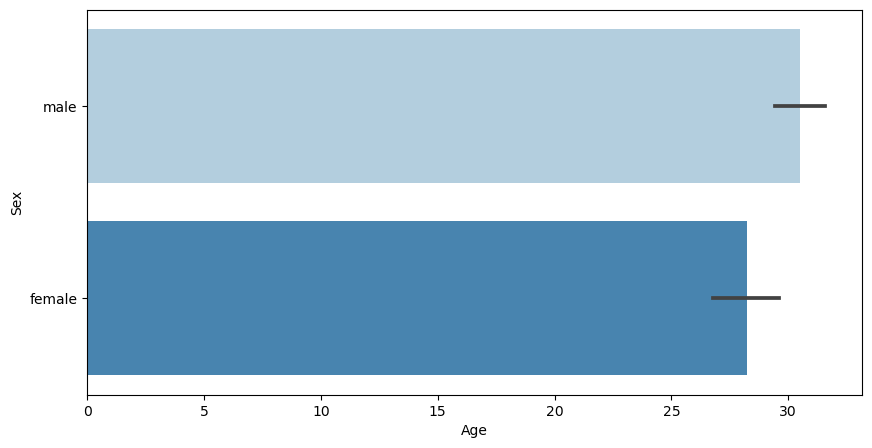

In [25]:
print('You can plot graph on:\n01. Bar plot\n02. Hexbin or Joint Plot \n03. Scattered Plot \n04. Reg Plot \n05. Line Plot \n06. Point Map \n07. Violin Plot')
n=int(input('Enter your Choice'))
OneNumOneCat(titanic['Age'],titanic['Sex'],n)

Highest number of male where there on the ship compared to female. age group of 25 to 30

Plotting Bar Chart


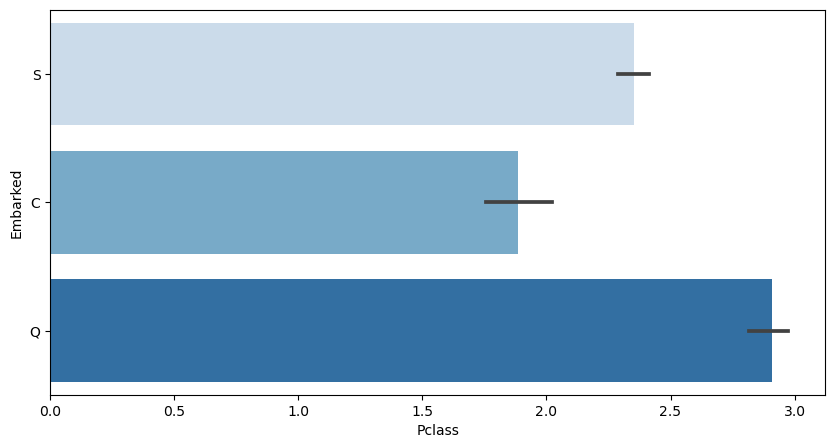

In [26]:
OneNumOneCat(titanic['Pclass'],titanic['Embarked'],1)

most of the people in passenger class 3 were from Queenstown 

most of the people in passenger class 2 where from Southampton

most of the people in passenger class 1 were from Cherbourg 

Plotting Bar Chart


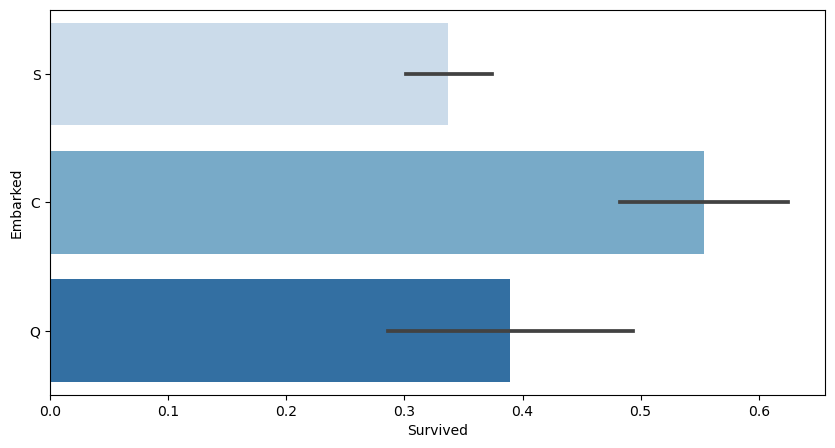

In [27]:
OneNumOneCat(titanic['Survived'],titanic['Embarked'],1)

most of the people from Southampton were survived

Plotting Bar Chart


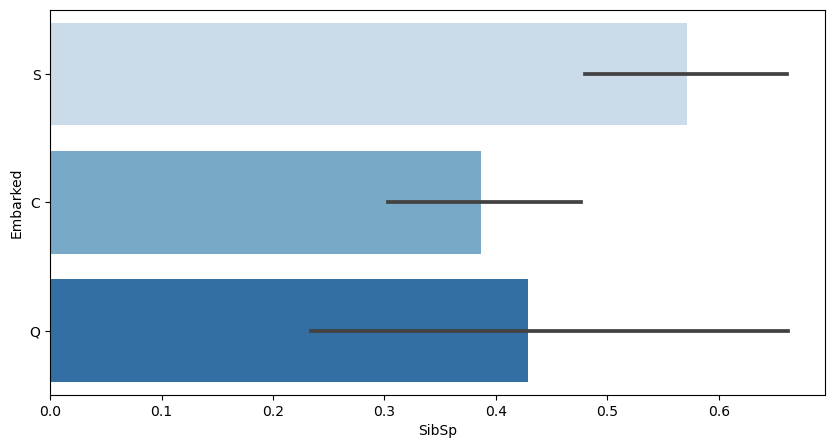

In [28]:
OneNumOneCat(titanic['SibSp'],titanic['Embarked'],1)

most of the people in passengers from Southampton had siblings and spose

Plotting Bar Chart


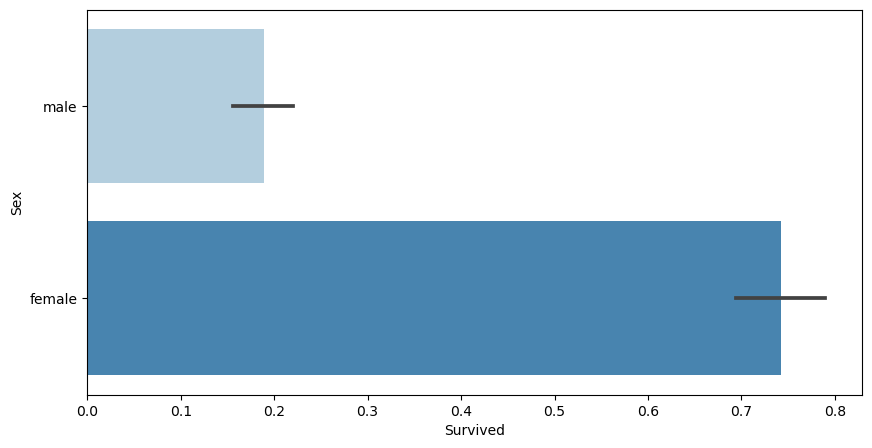

In [29]:
OneNumOneCat(titanic['Survived'],titanic['Sex'],1)

Female survived more compared to male

Plotting Bar Chart


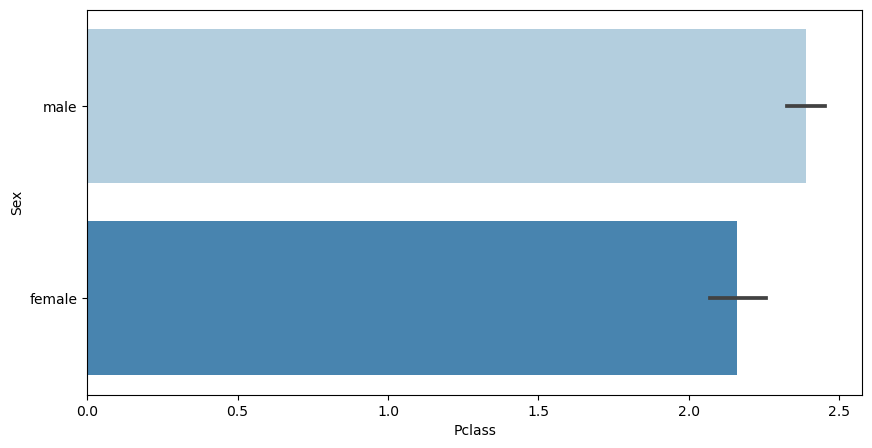

In [30]:
OneNumOneCat(titanic['Pclass'],titanic['Sex'],1)

Most of the men's were there in passenger class 2 and 3

Plotting Violinplot


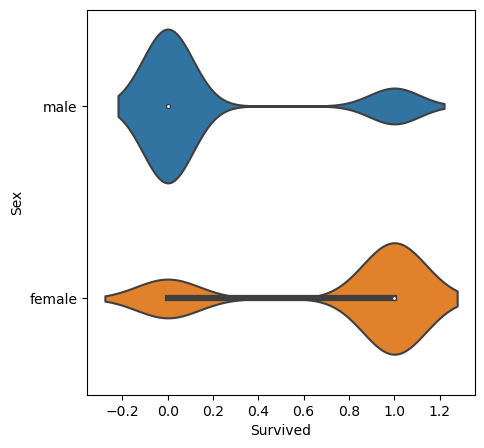

In [31]:
OneNumOneCat(titanic['Survived'],titanic['Sex'],7)

female survival ratio is high compared to male

Plotting Linepolt


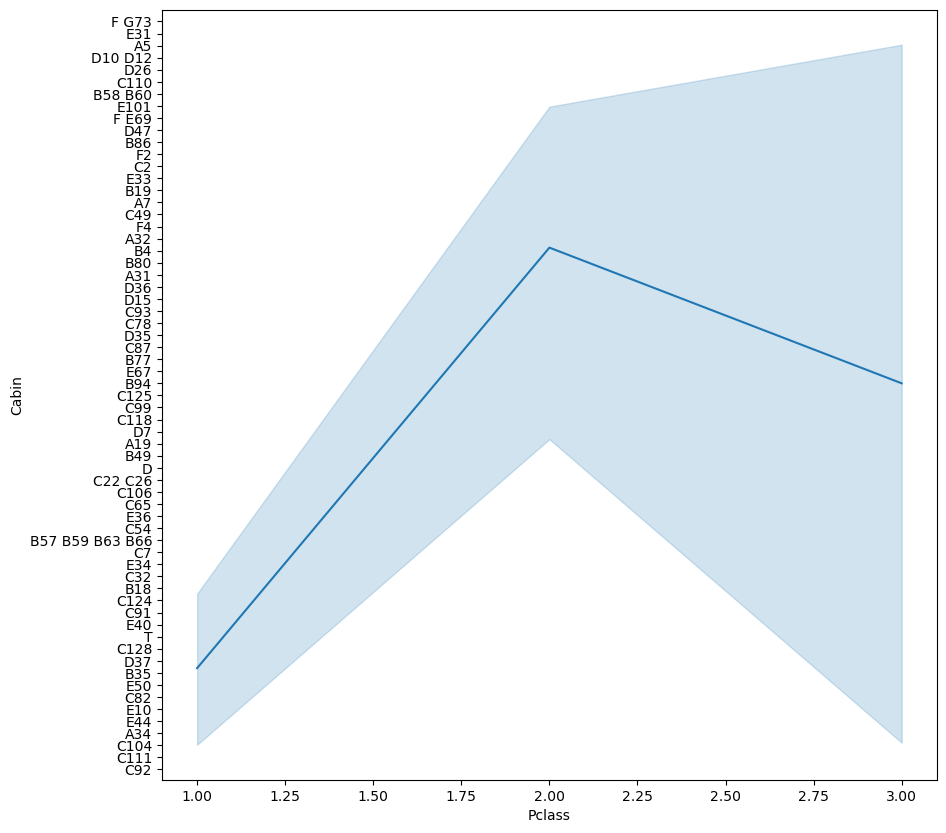

In [32]:
OneNumOneCat(titanic['Pclass'],titanic['Cabin'],5)

Plotting histogram Chart


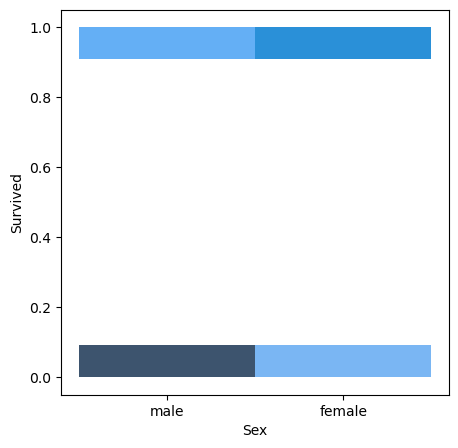

In [33]:
OneNumOneCat(titanic['Survived'],titanic['Sex'],2)

Plotting Pointplot


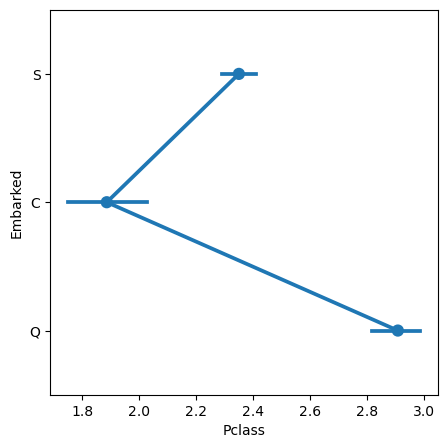

In [34]:
OneNumOneCat(titanic['Pclass'],titanic['Embarked'],6)

most of the people in passenger class 3 were from Queenstown

most of the people in passenger class 2 where from Southampton

most of the people in passenger class 1 were from Cherbourg

# 3.Plot two numerical columns and one categorical column.

# Function to plot TWO numerical ONE catagorical columns 

Name of the function is TwoNumOneCat. 

1. This function first checks the dtype for both parameters 
2. Then if the user input is not in numeric return "Enter Valid Input"
3. using if statement for user specific input for plot
4. Using sns(Seaborn)library ploting graphs 
5. c1 is first numeric feature entry
6. c2 is second numeric feature entry
6. c3 is catagorical feature entry
7. n is type of graph input entry

# TWO Numerical  ONE Caragorical varibales means it comes under Multivariate Analysis

some of the Multivariate plot are

01. Bar plot
02. Hist Plot 
03. Catagorical Scattered Plot 
04. Boxplots Plot 
05. Line Plot 
06. Point Map 
07. Violin Plot

In [35]:
def TwoNumOneCat(c1,c2,c3,n):
    if c1.dtype=='float64' and c2.dtype=='float64' and c3.dtype=='object':
        
        if(n==0 or n>10):
            return "Enter Valid Input"
        if(n==1):
            print('Plotting Scatter Chart')
            plt.figure(figsize=(5,5))
            sns.scatterplot(data=titanic,x=c1,y=c2,hue=c3)
            plt.show()
        if(n==2):
            print('Plotting Bar Chart')
            plt.figure(figsize=(10,10))
            sns.catplot(x=c3,y=c1,data=titanic,kind='bar',hue=c2)
            plt.show()
        if(n==3):
            print('Plotting swarm Chart')
            plt.figure(figsize=(10,10))
            sns.catplot(x=c1,y=c2,data=titanic,hue=c3,kind='swarm')
            plt.show()
        if(n==4):
            print('Plotting Boxplots Chart')
            plt.figure(figsize=(100,10))
            sns.catplot(x=c1,y=c2,data=titanic,kind='box',hue=c3)
            plt.show()
        
        if(n==5):
            print('Plotting Point Chart')
            plt.figure(figsize=(10,10))
            sns.catplot(x=c3,y=c1,data=titanic,kind='point',hue=c2)
            plt.show()
        if(n==6):
            print('Plotting Violin Chart')
            plt.figure(figsize=(30,10))
            sns.violinplot(x=c1,y=c2,data=titanic,hue=c3)
            plt.show()   
       
        return  
    else:
        return 'Pass 2 numeric and 1 categorical columns'

You can plot graph on:
01. Scatter plot
02. bar Plot 
03. Swarm Plot 
04. Boxplots Plot 
05. Point Map
Enter your Choice: 1
Plotting Scatter Chart


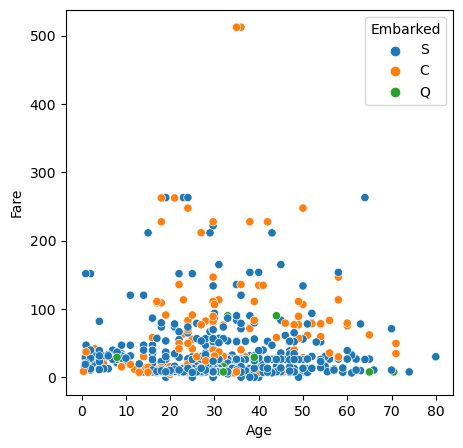

In [36]:
print('You can plot graph on:\n01. Scatter plot\n02. bar Plot \n03. Swarm Plot \n04. Boxplots Plot \n05. Point Map')
n=int(input('Enter your Choice: '))
TwoNumOneCat(titanic['Age'],titanic['Fare'],titanic['Embarked'],n)

From this plot we can clearly see a most of the the passengers are from southampton.

Very less passengers are from queenstown

Plotting Scatter Chart


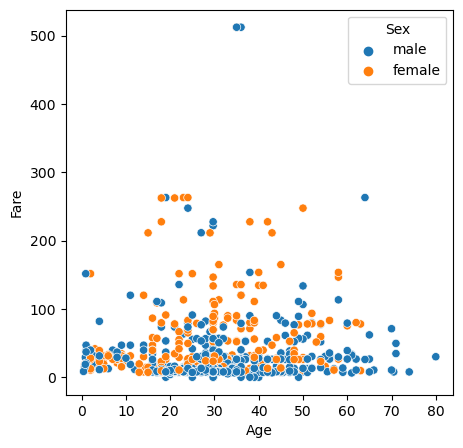

In [37]:
TwoNumOneCat(titanic['Age'],titanic['Fare'],titanic['Sex'],1)

Most of the men's are are in  passenger class 3 and has the fare price is low. there are more female in passenger class 2. 

Most of the fair range between 20 to 100 euros

Plotting Violin Chart


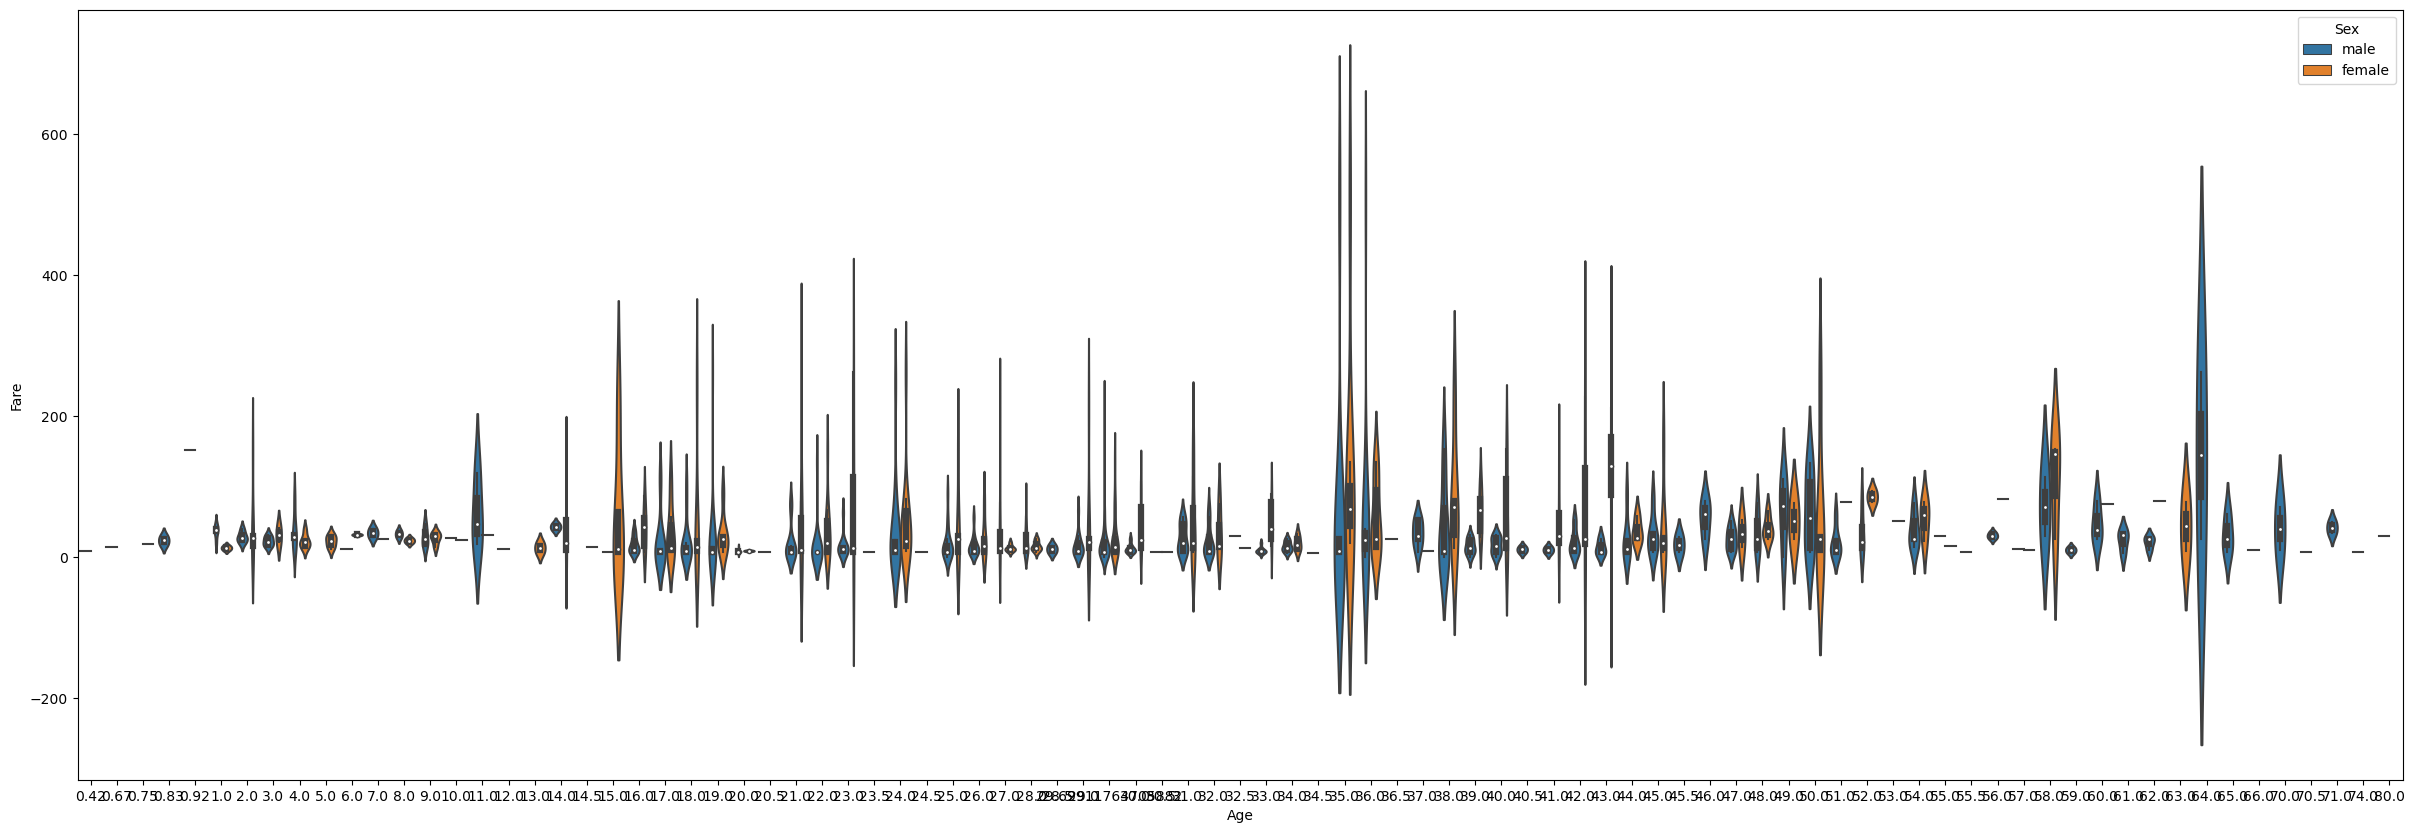

In [38]:
TwoNumOneCat(titanic['Age'],titanic['Fare'],titanic['Sex'],6)

This plot shows relation between age,fair of male and female

Plotting Violin Chart


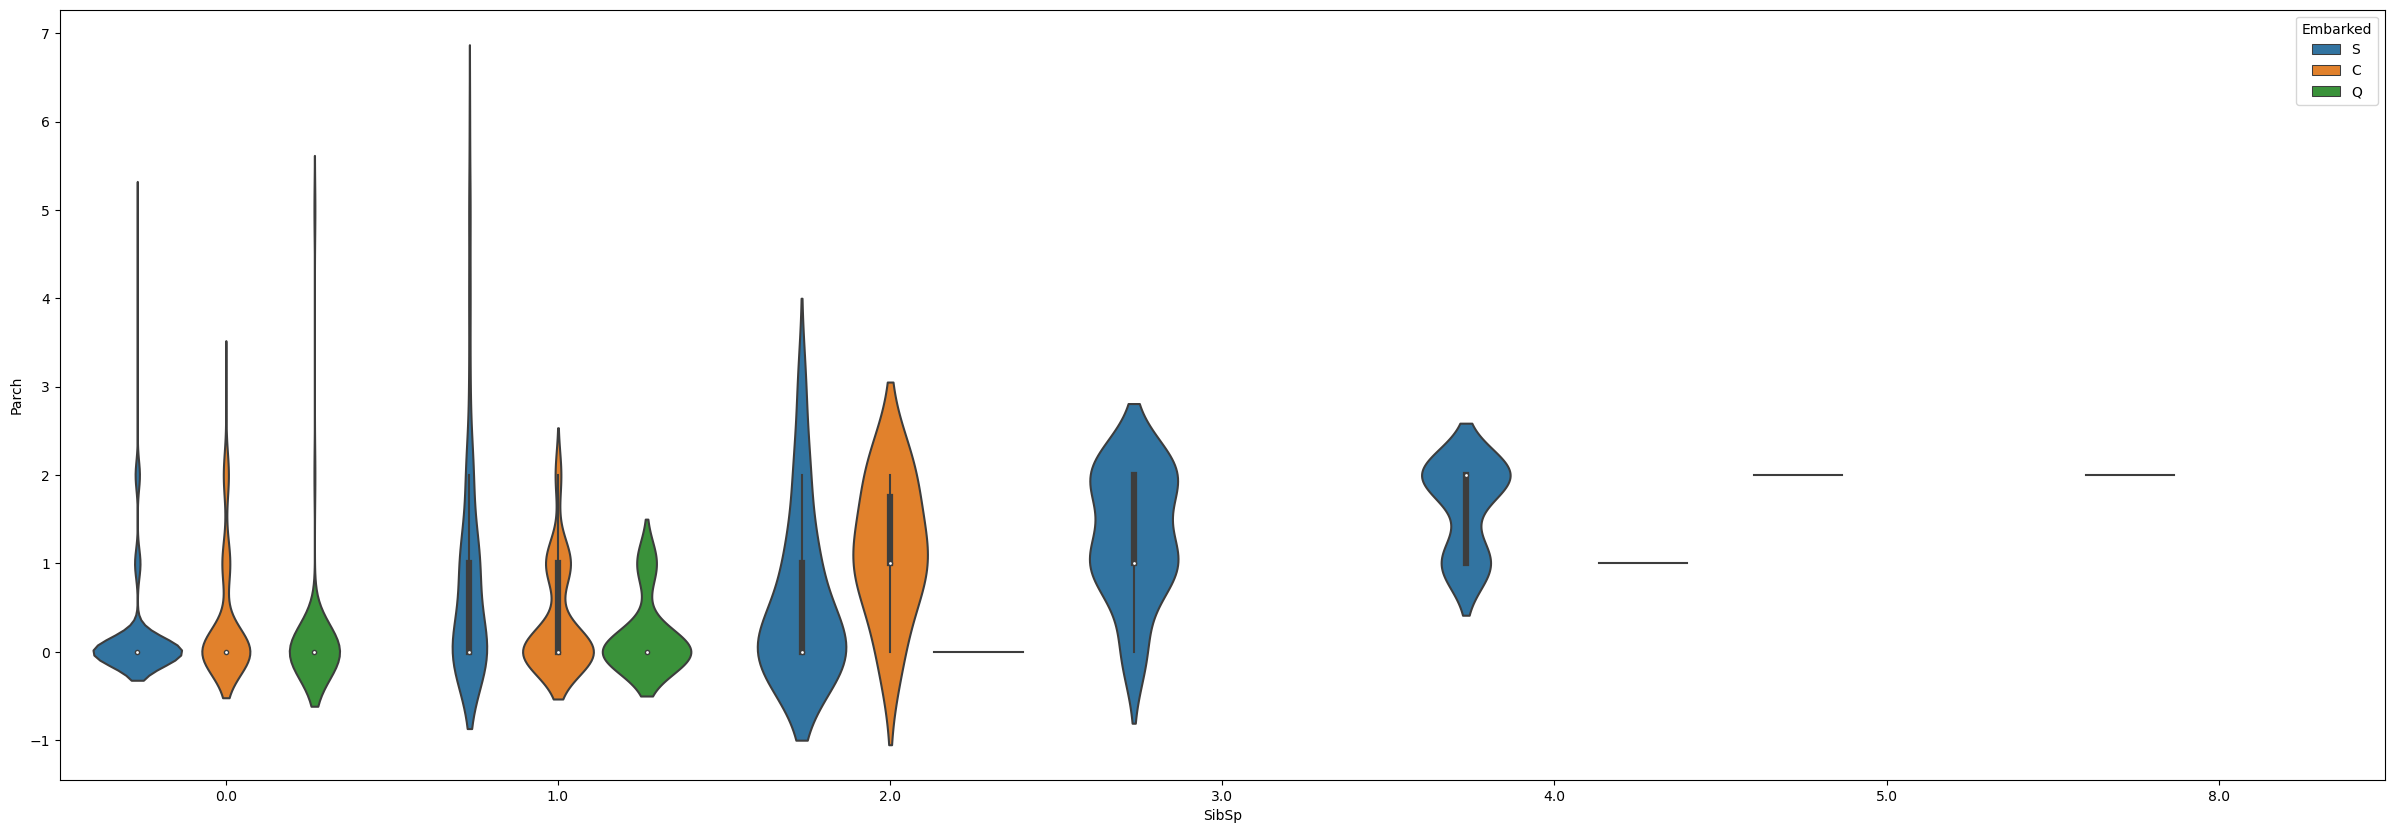

In [39]:
TwoNumOneCat(titanic['SibSp'],titanic['Parch'],titanic['Embarked'],6)

Plotting Violin Chart


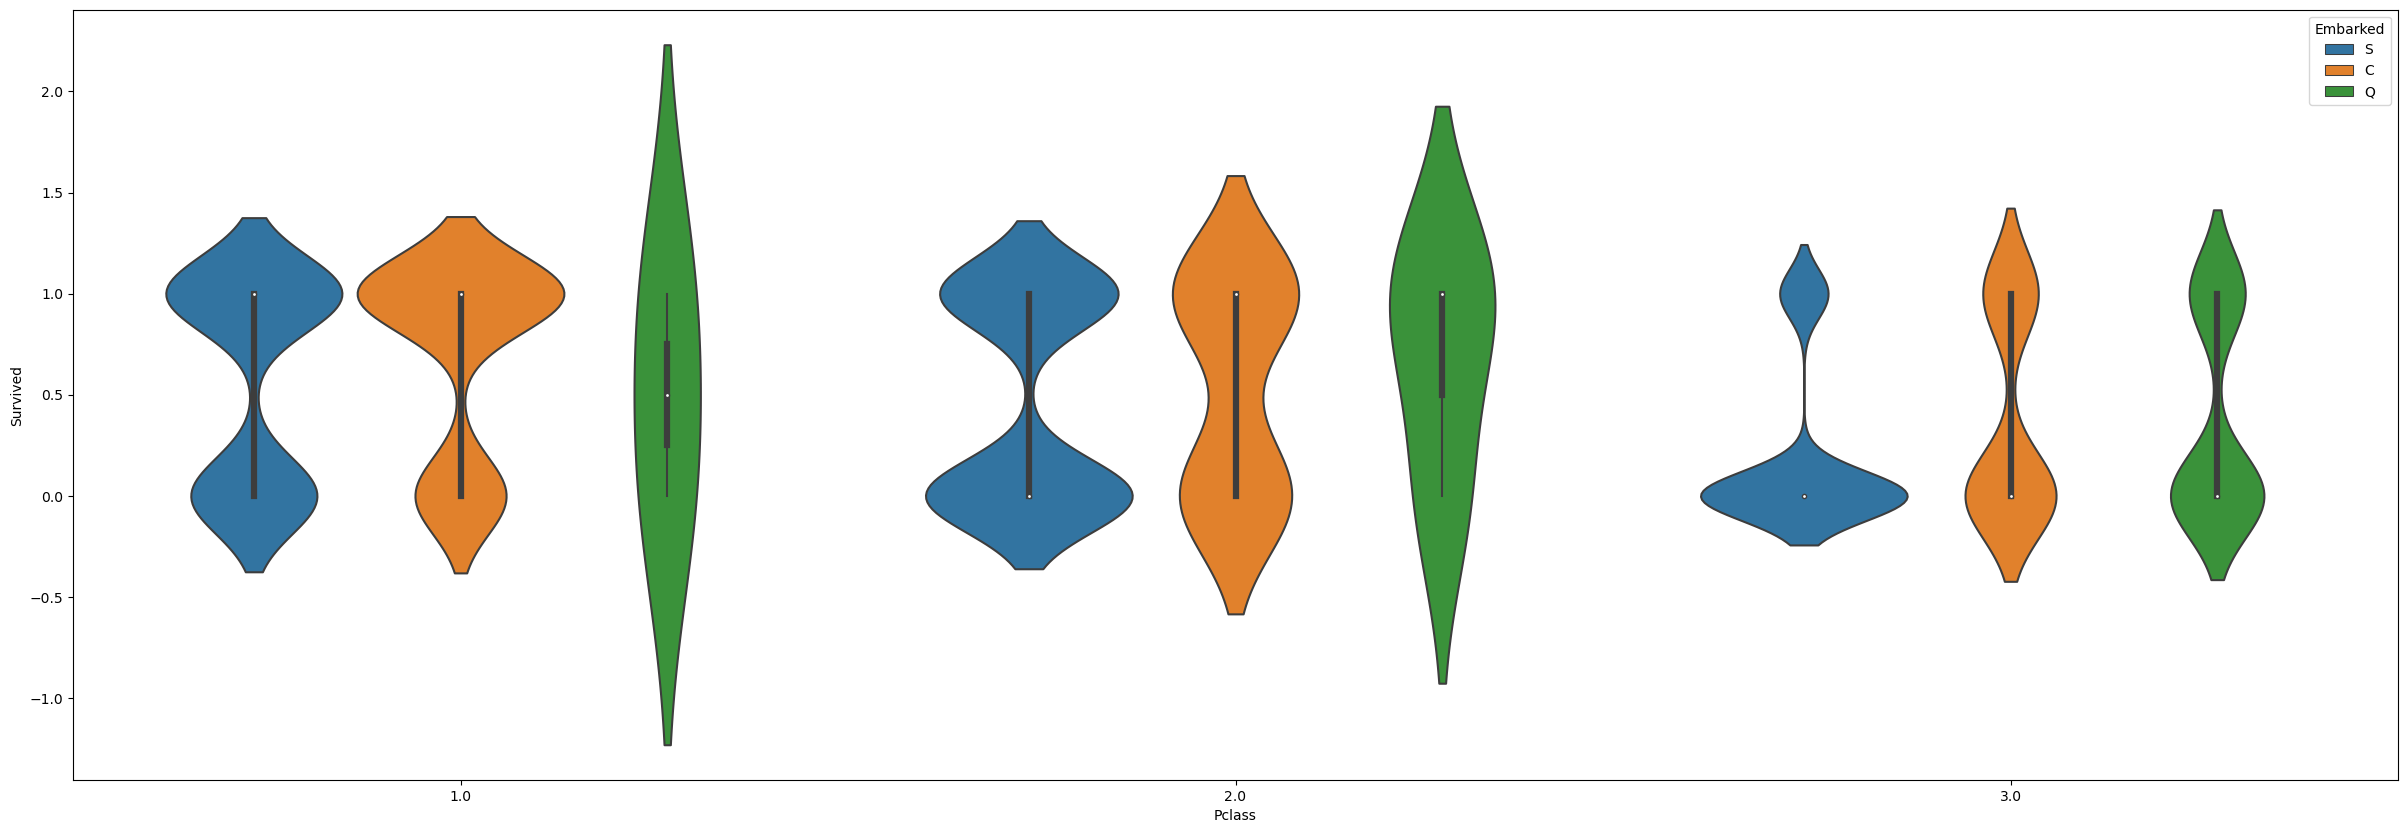

In [40]:
TwoNumOneCat(titanic['Pclass'],titanic['Survived'],titanic['Embarked'],6)

This plot shows people survived based on passenger class and city they belong to

# 5.Check the cardinality of a categorical column.

Cardinality can be used to define data models as well as analyze entities within datasets.

It is nothing but the uniqueness of the feature

In [41]:
def cardinality(c1):
    card=titanic[['Name','Sex','Ticket','Cabin','Embarked']].nunique()
    return card

In [42]:
cardinality(titanic)

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

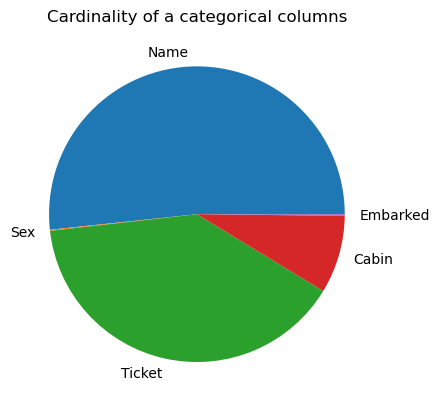

In [43]:
y = np.array([891,2,681,147,3])
card=['Name','Sex','Ticket','Cabin','Embarked']
plt.pie(y, labels = card)
plt.title("Cardinality of a categorical columns")
plt.show()

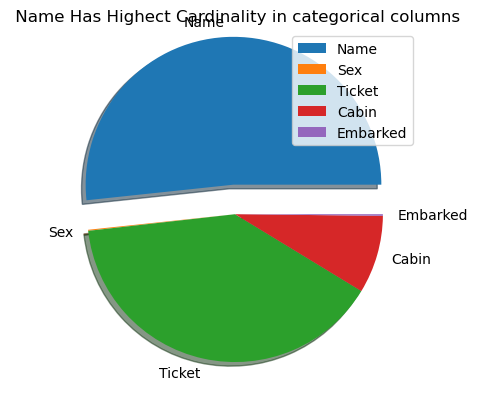

In [44]:
y = np.array([891,2,681,147,3])
card=['Name','Sex','Ticket','Cabin','Embarked']
myexplode = [0.2, 0, 0.0, 0,0]
plt.pie(y, labels = card,explode = myexplode,shadow=True)
plt.title(" Name Has Highect Cardinality in categorical columns")
plt.legend()
plt.show()